In [83]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys

In [84]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [85]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/9Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/8Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/3Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/10Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/11Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/7Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/6Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/4Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/5Npie.txt


dtype('float32')

In [86]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [87]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,-0.6
1,1.0,-0.6
2,2.0,-0.6
3,3.0,-0.6
4,4.0,-0.6
...,...,...
187855,187855.0,4.1
187856,187856.0,4.1
187857,187857.0,4.1
187858,187858.0,4.1


([<matplotlib.lines.Line2D at 0x3320c98d0>], pandas.core.frame.DataFrame)

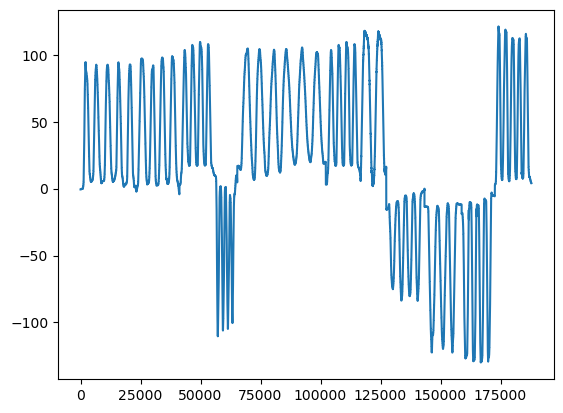

In [88]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [89]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 7
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 7            7.0        -0.6        6.0        5.0        4.0        3.0   
 8            8.0        -0.6        7.0        6.0        5.0        4.0   
 9            9.0        -0.6        8.0        7.0        6.0        5.0   
 10          10.0        -0.6        9.0        8.0        7.0        6.0   
 11          11.0        -0.6       10.0        9.0        8.0        7.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         4.1   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         4.1   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         4.1   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         4.1   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         4.1   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  
 7             2.0        1.0  

In [90]:
columnsTitles = ['FX Channel', 'Time', 'Time(t-1)', "Time(t-2)", "Time(t-3)", "Time(t-4)", 
                "Time(t-5)", "Time(t-6)", "Time(t-7)"]

shifted_df = shifted_df.reindex(columns=columnsTitles)

shifted_df

,FX Channel,Time,Time(t-1),Time(t-2),Time(t-3),Time(t-4),Time(t-5),Time(t-6),Time(t-7)
7,-0.6,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0
8,-0.6,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0
9,-0.6,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0
10,-0.6,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0
11,-0.6,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...
187855,4.1,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0,187849.0,187848.0
187856,4.1,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0,187849.0
187857,4.1,187857.0,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0,187850.0
187858,4.1,187858.0,187857.0,187856.0,187855.0,187854.0,187853.0,187852.0,187851.0


In [91]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset

((187853, 9),
 array([[-6.00000e-01,  7.00000e+00,  6.00000e+00, ...,  2.00000e+00,
          1.00000e+00,  0.00000e+00],
        [-6.00000e-01,  8.00000e+00,  7.00000e+00, ...,  3.00000e+00,
          2.00000e+00,  1.00000e+00],
        [-6.00000e-01,  9.00000e+00,  8.00000e+00, ...,  4.00000e+00,
          3.00000e+00,  2.00000e+00],
        ...,
        [ 4.10000e+00,  1.87857e+05,  1.87856e+05, ...,  1.87852e+05,
          1.87851e+05,  1.87850e+05],
        [ 4.10000e+00,  1.87858e+05,  1.87857e+05, ...,  1.87853e+05,
          1.87852e+05,  1.87851e+05],
        [ 4.10000e+00,  1.87859e+05,  1.87858e+05, ...,  1.87854e+05,
          1.87853e+05,  1.87852e+05]], dtype=float32))

In [92]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((187853, 8),
 (187853,),
 -0.6,
 array([7., 6., 5., 4., 3., 2., 1., 0.], dtype=float32))

In [93]:
X = dc(np.flip(X, axis=1))
X

array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.00000e+00,
        6.00000e+00, 7.00000e+00],
       [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 6.00000e+00,
        7.00000e+00, 8.00000e+00],
       [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 7.00000e+00,
        8.00000e+00, 9.00000e+00],
       ...,
       [1.87850e+05, 1.87851e+05, 1.87852e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.87851e+05, 1.87852e+05, 1.87853e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.87852e+05, 1.87853e+05, 1.87854e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [94]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150282, 8), (37571, 8), (150282,), (37571,))

In [95]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282]),
 torch.Size([37571]))

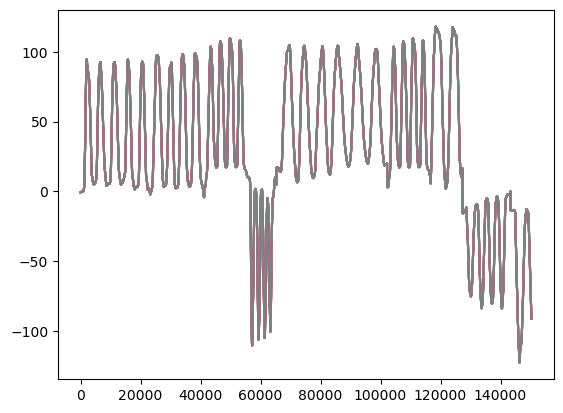

In [96]:
plt.plot(X_train, y_train)

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train.shape

((150282, 8), (150282, 1))

In [98]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8]),
 torch.Size([37571, 8]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [99]:
type(X_train)

torch.Tensor

In [100]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [101]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150282, 8, 1]),
 torch.Size([37571, 8, 1]),
 torch.Size([150282, 1]),
 torch.Size([37571, 1]))

In [104]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [105]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 16

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)

#check out what we've created
# print(f"Dataloaders: {train_dataloader, test_dataloader}")
# print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
# print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

In [106]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 8, 1]) torch.Size([16, 1])


In [107]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [108]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [109]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [110]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [111]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.224
Batch 200, Loss: 0.179
Batch 300, Loss: 0.182
Batch 400, Loss: 0.155
Batch 500, Loss: 0.151
Batch 600, Loss: 0.136
Batch 700, Loss: 0.129
Batch 800, Loss: 0.135
Batch 900, Loss: 0.125
Batch 1000, Loss: 0.126
Batch 1100, Loss: 0.129
Batch 1200, Loss: 0.116
Batch 1300, Loss: 0.123
Batch 1400, Loss: 0.122
Batch 1500, Loss: 0.130
Batch 1600, Loss: 0.110
Batch 1700, Loss: 0.124
Batch 1800, Loss: 0.114
Batch 1900, Loss: 0.114
Batch 2000, Loss: 0.118
Batch 2100, Loss: 0.115
Batch 2200, Loss: 0.127
Batch 2300, Loss: 0.112
Batch 2400, Loss: 0.117
Batch 2500, Loss: 0.110
Batch 2600, Loss: 0.127
Batch 2700, Loss: 0.117
Batch 2800, Loss: 0.114
Batch 2900, Loss: 0.118
Batch 3000, Loss: 0.115
Batch 3100, Loss: 0.128
Batch 3200, Loss: 0.119
Batch 3300, Loss: 0.121
Batch 3400, Loss: 0.115
Batch 3500, Loss: 0.114
Batch 3600, Loss: 0.114
Batch 3700, Loss: 0.117
Batch 3800, Loss: 0.106
Batch 3900, Loss: 0.115
Batch 4000, Loss: 0.117
Batch 4100, Loss: 0.116
Batch 4200, Loss

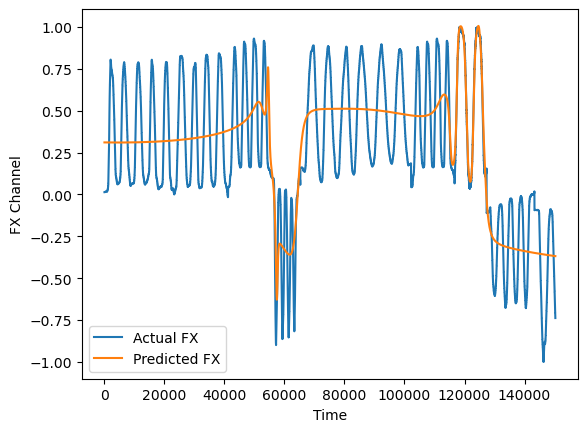

In [113]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


In [ ]:
  # Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
predictions = np.array([])

# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            global predictions

            hidden = model.init_zero_hidden(batch_size=model.batch_size)

            # Send data to the target device
            X, y, hidden = X.reshape(1, len(X), 1).to(device), y.reshape(1, len(X), 1).to(device), hidden

            y_pred = model(X, hidden)
            print(f"y pred shape: {y_pred}")
            predictions = np.append(predictions, y_pred)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
eval_model(model=model,
           data_loader= test_loader,
           loss_fn = loss_function,
           accuracy_fn=accuracy_fn,
           device=device)

AttributeError: 'LSTM' object has no attribute 'init_zero_hidden'

In [ ]:
# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(20, 15))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

ValueError: x and y must be the same size

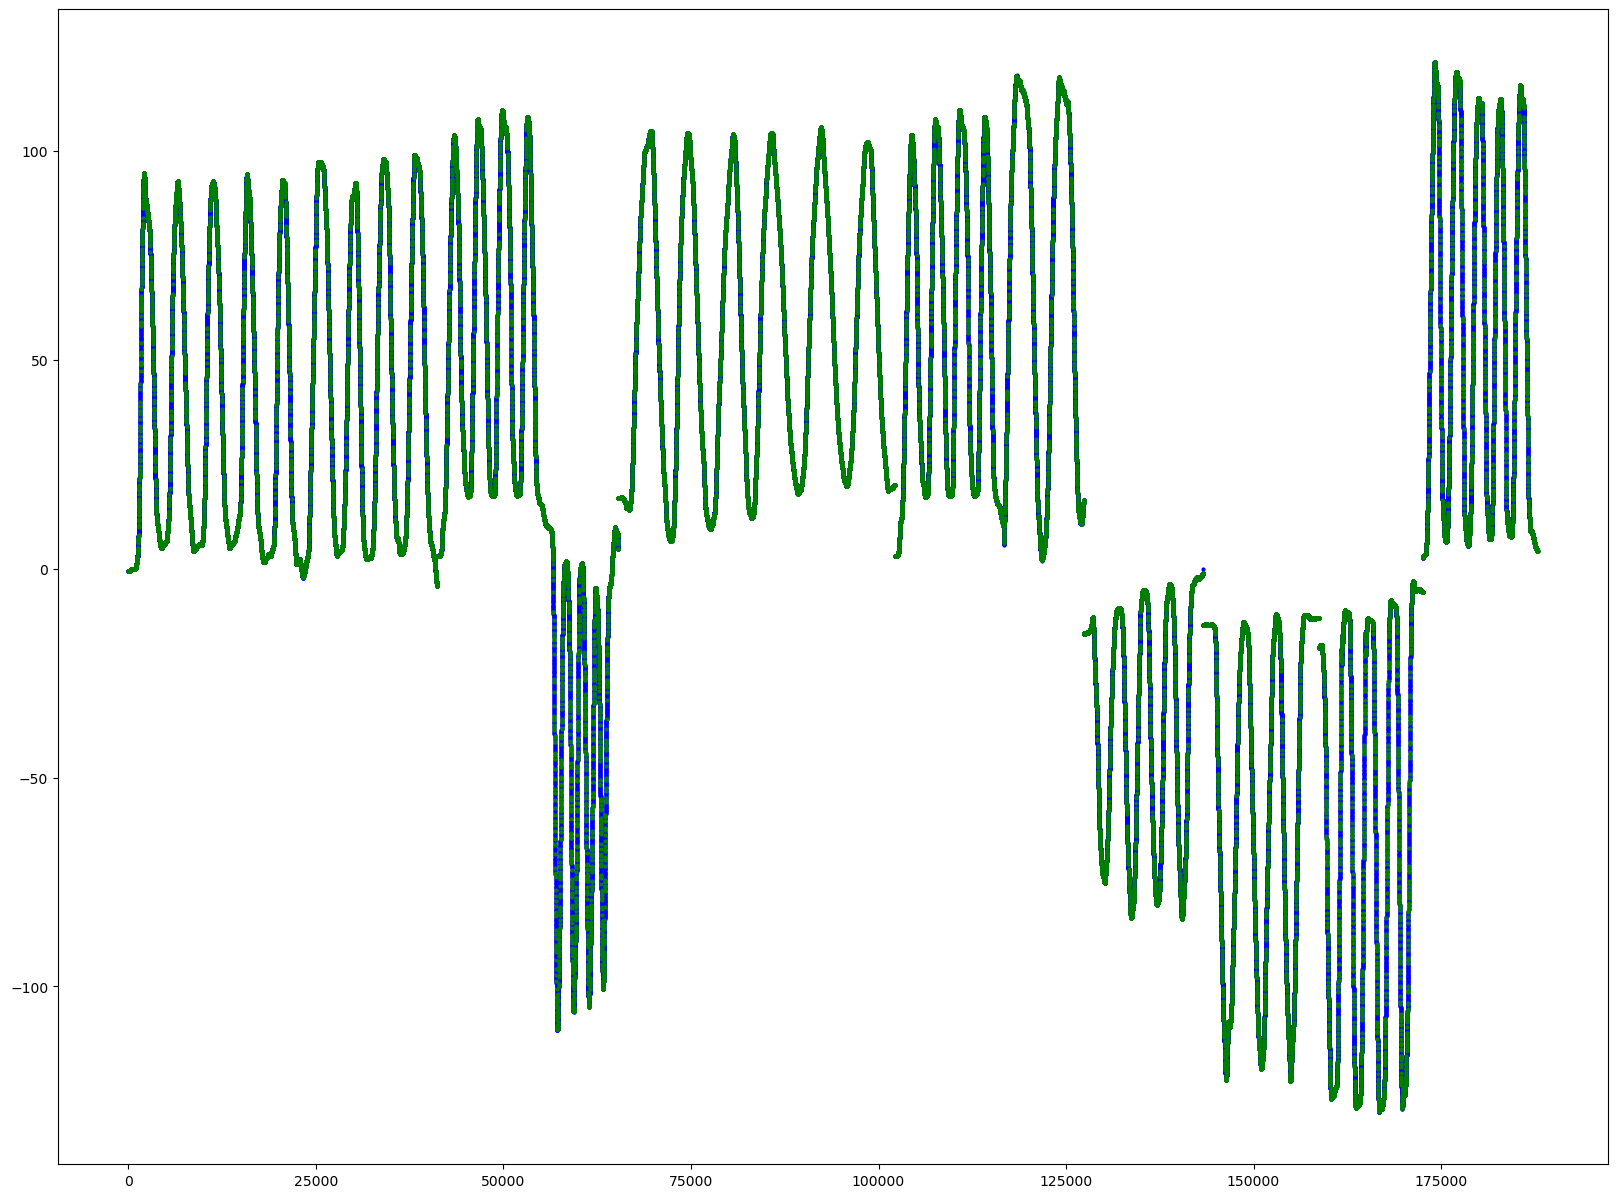

In [ ]:
plot_predictions(X_train.cpu().numpy(), y_train.cpu().numpy(), X_test.cpu().numpy(), y_test.cpu().numpy(), predictions=predictions)

In [ ]:
#testing a different model
# number of points
num_time_steps = len(fx_data)
hidden_size = 8
input_size = 1
output_size = 1
lr = 0.1


class RNN_Model(nn.Module):
    def __init__(self):
        super(RNN_Model, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
            # use batch_first for input with another data shape with b first
        )
        # compress output to the same dim as y
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):
        out, hidden_prev = self.rnn(x, hidden_prev)
        # [1, seq, h] => [seq, h]  (batch=1)
        out = out.reshape(-1, hidden_size)  # stack batch and seq

        # linear layer so that output is not [seq,h] but [seq, 1]
        # so it is comparable with y, for loss calculation
        out = self.linear(out)  # [seq, h] => [seq, 1]
        out = out.unsqueeze(dim=0)  # => [1, seq, 1]
        return out, hidden_prev



model = RNN_Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

hidden_prev = torch.zeros(1, 1, hidden_size)  # [b, layer, mem_size]

In [ ]:
EPOCHS = 20

training_loop(model=model,
              dataloader=train_dataloader,
              epochs = EPOCHS,
              optimizer=optimizer,
              loss_fn=loss_fn)

epoch: 0 | loss: 2681.701171875
epoch: 1 | loss: 2681.907958984375
epoch: 2 | loss: 2682.216796875
epoch: 3 | loss: 2682.45654296875
epoch: 4 | loss: 2682.518798828125
epoch: 5 | loss: 2682.425048828125
epoch: 6 | loss: 2682.2109375
epoch: 7 | loss: 2681.94873046875
epoch: 8 | loss: 2681.7392578125
epoch: 9 | loss: 2681.713134765625
epoch: 10 | loss: 2681.81396484375
epoch: 11 | loss: 2681.898681640625
epoch: 12 | loss: 2681.905029296875
epoch: 13 | loss: 2681.8427734375
epoch: 14 | loss: 2681.73486328125
epoch: 15 | loss: 2681.697021484375
epoch: 16 | loss: 2681.719970703125
epoch: 17 | loss: 2681.72314453125
epoch: 18 | loss: 2681.70849609375
epoch: 19 | loss: 2681.702392578125


In [ ]:
  # Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
predictions = np.array([])

# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            global predictions

            hidden = torch.zeros(2, 16) 
            print(f"{hidden}")

            print(f"{X}")

            # Send data to the target device
            X, y, hidden = X.reshape(1, len(X), 1).to(device), y.reshape(1, len(X), 1).to(device), hidden

            y_pred = model(X, hidden)
            print(f"y pred shape: {y_pred}")
            predictions = np.append(predictions, y_pred)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred)

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
eval_model(model=rnn,
           data_loader= test_dataloader,
           loss_fn = loss_fn,
           accuracy_fn=accuracy_fn,
           device=device)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([150288., 150289., 150290., 150291., 150292., 150293., 150294., 150295.,
        150296., 150297., 150298., 150299., 150300., 150301., 150302., 150303.])


RuntimeError: The size of tensor a (16) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1, 8, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 8, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_dataloader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch, (X, y) in enumerate(test_dataloader):
        x_batch, y_batch = X.to(device), y.to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_dataloader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:


for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


ValueError: LSTM: Expected input to be 2D or 3D, got 1D instead